# Load the complete geographical dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
geography = pd.read_csv('complete_geography.csv',encoding='latin1')
del geography['Unnamed: 0']
geography.head(10)

,city,latitude,longitude,runners,distance,population,canton
0,St-Légier-La Chiésaz,46.47171849999999,6.876770899999999,12,24209.0,NaN,NaN
1,St-Légier,46.47171849999999,6.876770899999999,57,24023.0,NaN,NaN
2,Ernen,46.39850010000001,8.1457733,1,165658.0,NaN,NaN
3,Lausanne,46.5196535,6.6322734,2043,0.0,135629,VD
4,Pully,46.5092681,6.6654949,312,3001.0,17807,VD
5,Chavannes-près-Renens,46.5316376,6.574969599999999,56,5363.0,NaN,NaN
6,F-Amiens,49.894067,2.295753,1,660413.0,NaN,NaN
7,Genève,46.2043907,6.1431577,503,63283.0,NaN,NaN
8,Poliez-le-Grand,46.63767,6.66287,6,18352.0,NaN,NaN
9,E-L'Hospitalet de Llobreg,41.3661865,2.1164942,1,852778.0,NaN,NaN


In [3]:
geography.population.notnull().value_counts()

False    1826
True      164
Name: population, dtype: int64

Only a few percentage of the data has been mapped into a city whose population is recorded in Wikipedia; for our qualitative purpose it should be sufficient though.

# Gravitational model and qualitative analysis

In this section we try to explore possible correlations between the number of participants to the Lausanne's Marathon and the other geographical features we have introduced.

In [4]:
# consider only nonnull entries of the dataset
geo = geography.dropna(axis=0,subset=['population','canton'])
geo.head()

,city,latitude,longitude,runners,distance,population,canton
3,Lausanne,46.5196535,6.6322734,2043,0.0,135629,VD
4,Pully,46.5092681,6.6654949,312,3001.0,17807,VD
10,Zürich,47.3768866,8.541694,133,226399.0,396027,ZH
13,Rolle,46.4612971,6.3397549,46,27630.0,6109,VD
16,Sion,46.2331221,7.360625999999999,53,95792.0,33532,VS


In [5]:
# convert population data into integers
p = []
for pop in geo.population:
    pop = pop.replace(',','')
    pop = pop.replace('?','')
    p.append(float(pop))
P = 135629 # Lausanne's population

In [6]:
predictor = []
for j in range(len(geo)):
    predictor.append(P*p[j]/(geo.distance[geo.index[j]]*geo.distance[geo.index[j]]))
predictor = predictor[1:] # exclude Lausanne: distance = 0.00 y definition
response = list(geo.runners)
response = response[1:]

Plot the relevant features to reveal correlations and enlight a possible *gravitational* relationship between number of participants and population/distance^2:

Look now at features separately:

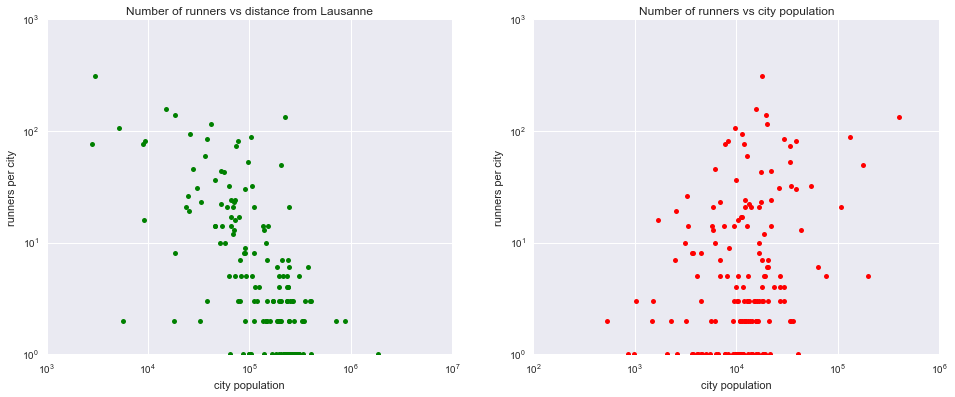

In [20]:
plt.subplot(1,2,1)
plt.plot(geo.distance[1:],response,marker='.',linestyle='',markersize=10,color='green')
plt.xscale('log')
plt.yscale('log')
plt.title('Number of runners vs distance from Lausanne')
plt.xlabel('city population')
plt.ylabel('runners per city')

plt.subplot(1,2,2)
plt.plot(p[1:],response,marker='.',linestyle='',markersize=10,color='red')
plt.xscale('log')
plt.yscale('log')
plt.title('Number of runners vs city population')
plt.xlabel('city population')
plt.ylabel('runners per city')

plt.gcf().set_size_inches(16,6)

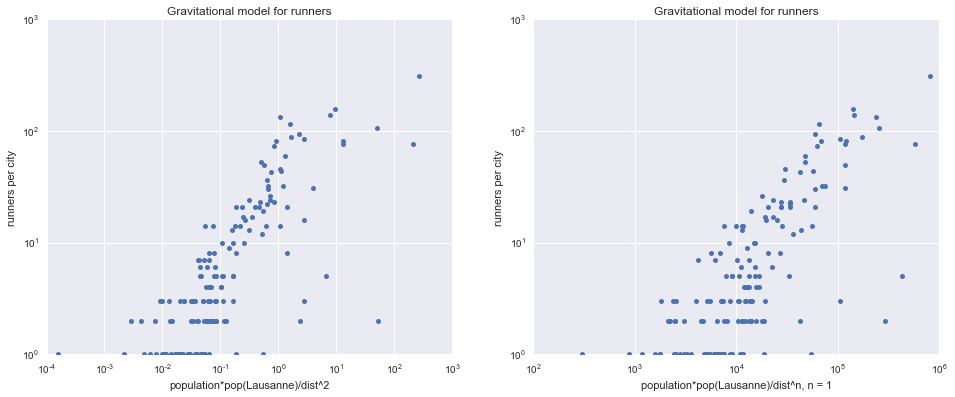

In [34]:
plt.subplot(1,2,1)
plt.plot(predictor,response,marker='.',linestyle='',markersize=10)
plt.xscale('log')
plt.yscale('log')
plt.title('Gravitational model for runners')
plt.xlabel('population*pop(Lausanne)/dist^2')
plt.ylabel('runners per city')

n = 1; # integer to be chosen: distance scaling -> n = 2 is actually the most meaningful
pred2 = []
d = list(geo.distance)
for i in range(len(predictor)):
    pred2.append(P*p[i+1]/pow(d[i+1],n))

plt.subplot(1,2,2)
plt.plot(pred2,response,marker='.',linestyle='',markersize=10)
plt.xscale('log')
plt.yscale('log')
plt.title('Gravitational model for runners')
plt.xlabel('population*pop(Lausanne)/dist^n, n = '+str(n))
plt.ylabel('runners per city')

plt.gcf().set_size_inches(16,6)

Let us now aggregate the data by Canton. The results are coherent with the logical expectations:

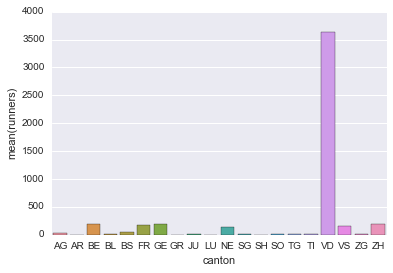

In [11]:
canton_geo = geo.groupby('canton').apply(np.sum)['runners']
sns.barplot(x=canton_geo.index, y=canton_geo)